In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/materials/material.csv
/kaggle/input/materials/Decision Tree.py
/kaggle/input/materials/Data.csv
/kaggle/input/materials/decision_tree.png


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve,confusion_matrix,classification_report, roc_auc_score, precision_recall_curve, auc,roc_curve

In [3]:
material_df=pd.read_csv("/kaggle/input/materials/material.csv")
material_df.head()

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.3,7860,True


In [4]:
material_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  1552 non-null   object 
 1   Su        1552 non-null   int64  
 2   Sy        1552 non-null   int64  
 3   E         1552 non-null   int64  
 4   G         1552 non-null   int64  
 5   mu        1552 non-null   float64
 6   Ro        1552 non-null   int64  
 7   Use       1552 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 86.5+ KB


In [5]:
Y=material_df["Use"]
X=material_df.drop(columns=["Material","Use"])

In [6]:
Y=Y.astype('int')

<Axes: xlabel='Use', ylabel='count'>

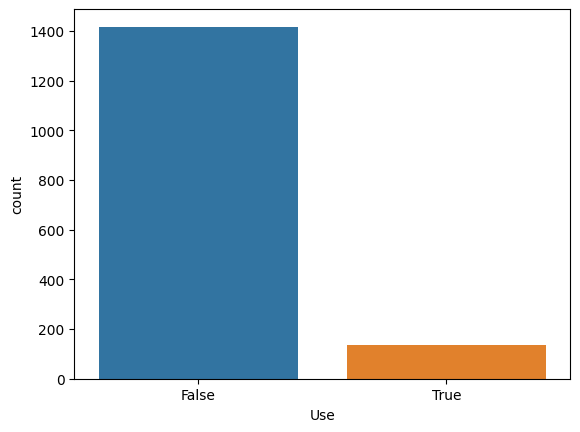

In [7]:
sns.countplot(data=material_df,x='Use')

as we can see that the problem is imbalace class , so we mainly focusing on improving f1-score instead of accuracy

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y ,test_size=0.30,random_state=0)

In [9]:
lg=LogisticRegression()
sgd=SGDClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
gnb=GaussianNB()

In [10]:
model=[lg,sgd,svc,dt,rf,knn,gbc,abc,gnb]

In [11]:
model_name=[]
train_score=[]
test_score=[]
f1=[]
for k in model:
    k.fit(X_train,Y_train)
    t_score=k.score(X_train,Y_train)
    pred=k.predict(X_test)
    ts=accuracy_score(pred,Y_test)
    model_name.append(k)
    train_score.append(t_score)
    test_score.append(ts)
    f1.append(f1_score(pred,Y_test))

In [12]:
df=pd.DataFrame()
df['model']=model_name
df['train']=train_score
df['test']=test_score
df['f1_score']=f1

In [13]:
df

,model,train,test,f1_score
0,LogisticRegression(),0.864641,0.854077,0.028571
1,SGDClassifier(),0.917127,0.903433,0.000000
2,SVC(),0.917127,0.903433,0.000000
3,DecisionTreeClassifier(),1.000000,0.997854,0.989011
4,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.997854,0.989011
5,KNeighborsClassifier(),0.983425,0.967811,0.845361
6,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,0.997854,0.989011
7,"(DecisionTreeClassifier(max_depth=1, random_st...",1.000000,0.997854,0.989011
8,GaussianNB(),0.831492,0.866953,0.592105


As we can see that Gradient boost classification giving the train accuracy **100%** and test accuracy **99.97%** which is not the case of overfitting, and we also got the f1-score **98.98%** which is too good 

So we are proceeding with Gradient boost classification

In [14]:
pred=gbc.predict(X_test)

In [15]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       0.98      1.00      0.99        45

    accuracy                           1.00       466
   macro avg       0.99      1.00      0.99       466
weighted avg       1.00      1.00      1.00       466



In [16]:
confusion_matrix(Y_test,pred)

array([[420,   1],
       [  0,  45]])

In [17]:
# Compute ROC values
fpr, tpr, _ = roc_curve(Y_test,pred)
roc_auc = roc_auc_score(Y_test,pred)  # ROC AUC score

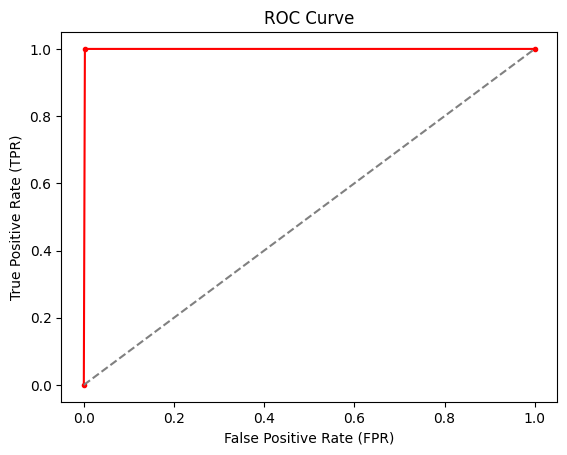

In [18]:
plt.plot(fpr, tpr, marker='.', label=f'ROC AUC = {roc_auc:.2f}', color='r')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

as we can see that curve is too ideal output

In [19]:
# ROC-AUC Score
roc_auc = roc_auc_score(pred,Y_test)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9891304347826086


In [20]:
precision_score(Y_test,pred)

0.9782608695652174

In [21]:
recall_score(Y_test,pred)

1.0

### **Function that will tell you which specific material is suitable according to your input**

In [22]:
def material_recommend_for_selection(input_values):
    inp=pd.DataFrame([input_values])
    out=gbc.predict(inp)
    if out[0]==0:
        return "No material sutable for selection"
    else:
        filtered_df = material_df[
        (material_df['Su'] <= input_values['Su']) & (input_values['Su'] <= material_df['Su'])  &
        (material_df['Sy'] <= input_values['Sy']) & (input_values['Sy'] <= material_df['Sy']) &
        (material_df['E'] <= input_values['E']) & (input_values['E'] <= material_df['E']) &
        (material_df['G'] <= input_values['G']) & (input_values['G'] <= material_df['G']) &
        (material_df['mu']<= input_values['mu']) & (input_values['mu'] <= material_df['mu']) &
        (material_df['Ro'] <= input_values['Ro']) & (input_values['Ro'] <= material_df['Ro'])
           ]
        m=list(filtered_df[filtered_df['Use']==True]['Material'].unique())
        return f"thsese material is suitable for selection  - {m}"

lets check with an example

In [23]:
# we are giving  input mechanical properties here
mech_prop={'Su': 450.0,
 'Sy': 275.0,
 'E': 198000.0,
 'G': 77000.0,
 'mu': 0.29,
 'Ro': 7820.0}

In [24]:
material_recommend_for_selection(input_values=mech_prop)

"thsese material is suitable for selection  - ['GOST Steel 25 GOST 1050-88 normalized']"